<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/arbol_decisiones_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
data100 = pd.read_excel('bd_manzanas.xlsx')
data100.head()

,peso,aroma,precio,diametro,color,estado
0,61.0,agradable,3.0,7.7,marron,comestible
1,61.0,agradable,4.0,8.0,rojo,comestible
2,55.0,agradable,5.0,6.2,rojo,comestible
3,48.0,desagradable,4.0,6.1,marron,malograda
4,50.0,agradable,2.0,5.9,marron,malograda


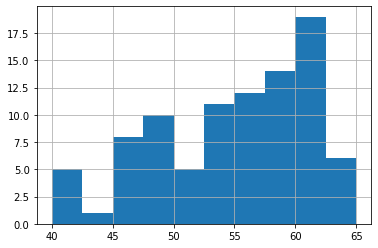

In [7]:
data100.peso.hist()

In [8]:
data100.aroma.value_counts()

agradable       61
desagradable    30
Name: aroma, dtype: int64

In [9]:
data100.color.unique()

array(['marron', 'rojo', 'verde'], dtype=object)

In [29]:
data200 = pd.get_dummies(data100, drop_first=True)
data200.head()

,peso,precio,diametro,aroma_desagradable,color_rojo,color_verde,estado_malograda
0,61.0,3.0,7.7,0,0,0,0
1,61.0,4.0,8.0,0,1,0,0
2,55.0,5.0,6.2,0,1,0,0
3,48.0,4.0,6.1,1,0,0,1
4,50.0,2.0,5.9,0,0,0,1


In [31]:
X = data200.drop(['estado_malograda'], axis=1) # predictores
y = data200.estado_malograda # variable predicha
X.shape, y.shape

((91, 6), (91,))

(array([61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

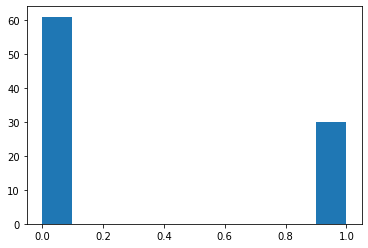

In [32]:
plt.hist(y)

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((63, 6), (63,), (28, 6), (28,))

In [36]:
model = DecisionTreeClassifier(max_depth=3)

In [37]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
y_hat = model.predict(X_train)
y_hat.shape

(63,)

In [39]:
data300 = pd.DataFrame(X_train)
data300['y_orig'] = y_train

In [40]:
data300['y_hat'] = y_hat
data300['coincide'] = (data300.y_orig == data300.y_hat)

In [41]:
data300.head()

,peso,precio,diametro,aroma_desagradable,color_rojo,color_verde,y_orig,y_hat,coincide
27,59.0,5.0,8.2,0,1,0,0,0,True
55,50.0,2.0,6.2,1,0,0,1,1,True
80,59.0,5.0,7.9,0,0,1,0,0,True
16,56.0,7.0,6.1,0,1,0,0,0,True
66,60.0,4.0,7.9,1,1,0,0,0,True


In [43]:
data300.coincide.sum()/len(data300)

0.9841269841269841

In [46]:
y_hat_test = model.predict(X_test)
y_hat_test

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1], dtype=uint8)

In [47]:
data_test = pd.DataFrame(X_test)
data_test['y_orig'] = y_test
data_test['y_hat'] = y_hat_test
data_test['coincide'] = (data_test.y_orig == data_test.y_hat)
data_test.coincide.sum()/len(data_test)

0.8571428571428571

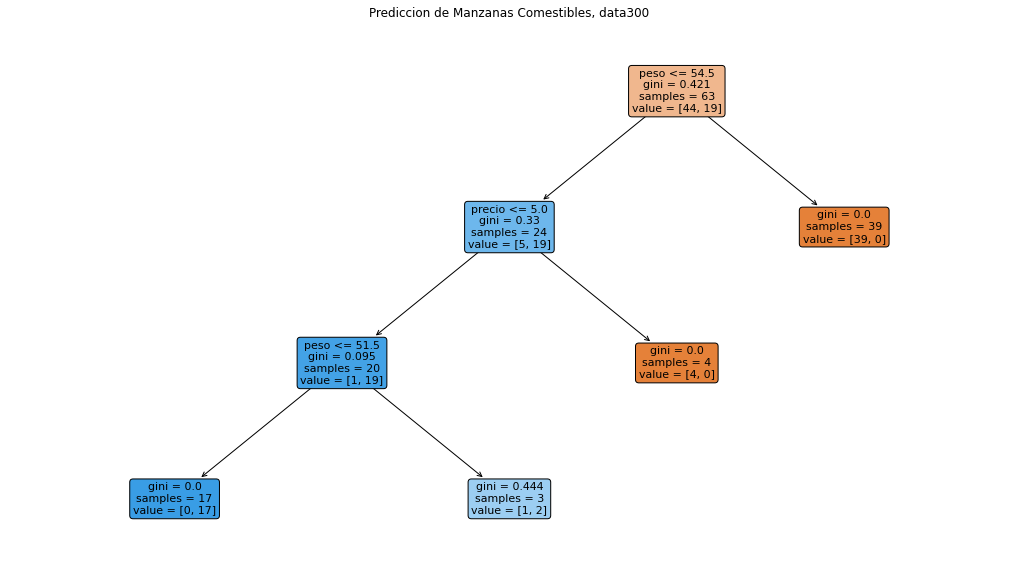

In [45]:
plt.figure(figsize=(18,10))
plot_tree(model, max_depth=3, rounded=True, fontsize=11, label='all', filled=True, feature_names=X.columns)
plt.title('Prediccion de Manzanas Comestibles, data300')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


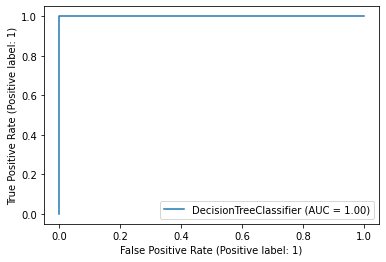

In [54]:
plot_roc_curve(model, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


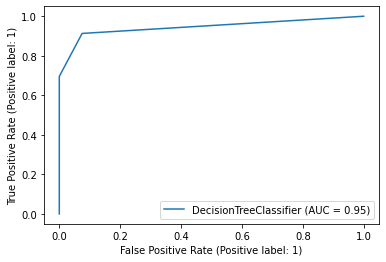

In [55]:
plot_roc_curve(model, X_train, y_train)